Welcome to the SNCAST jupyter notebook!

First lets load some libraries and default settings.
Please don't change anything in the cell below.

Click into the next cell and select 'Run' in the menu above, this will execute the python code in the cell.

In [1]:
%matplotlib inline
import numpy as np
import sys
from obspy.signal.util import util_geo_km
from math import pow, log10, sqrt
%reload_ext autoreload
%autoreload 1
%aimport sncast

First we need an input file that contains four comma separated columns containing for each seismic station:

    longitude, latitude, noise [nm], station name
         
    for example: -7.5100, 55.0700, 0.53, IDGL
    
Let's use an example file for Ireland, called "noisedata". If you want to use your own data replace the filename in the next cell.

Clicking into the next cell and selecting 'Run' in the menu above will execute the SNCAST python code.

In [2]:
sncast.minML('noisedata')

An output file will be generated with the ending ".grd". The exact filename depends on the parameters you have chosen. In the example above no parameters were chosen and hence default values were applied. Besides a longitude and latitude range applicable for Ireland the following default settings apply:

stat_num = 4	required number of station detections
snr = 3			required signal-to-noise ratio for detection
foc_depth = 0	assumed focal event depth in km
region = CAL	locality for assumed ML scale parameters ('UK' or 'CAL')

With these default settings the output file will be  "noisedata-stat4-foc0-snr3-CAL.grd"

Running the following cell will plot a contour map of the results.

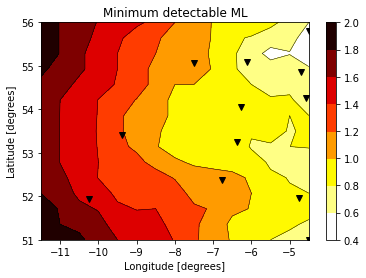

In [3]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x, y, z = np.loadtxt('noisedata-stat4-foc0-snr3-CAL.grd').T

# define grid
xi = np.linspace(-11.5,-4.5,15)
yi = np.linspace(51,56,15)

X,Y= np.meshgrid(xi,yi)

# grid the data
Z = griddata((x,y),z,(X,Y),method='linear')

# contour the gridded data, 
plt.contour(X,Y,Z,linewidths=0.5,colors='k')
plt.contourf(X,Y,Z,cmap=plt.cm.hot_r, vmax=(Z).max(), vmin=(Z).min())

plt.colorbar() # draw colorbar
plt.title('Minimum detectable ML')
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')

# mark station locations on map
xs, ys, zs, stat = np.genfromtxt('noisedata',delimiter=',').T
plt.autoscale(False)
plt.plot(xs,ys, marker='v',color='k',linestyle='none');
